In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import os

Đang load dữ liệu từ file combined_data.mat...

Shape của dữ liệu đã load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)


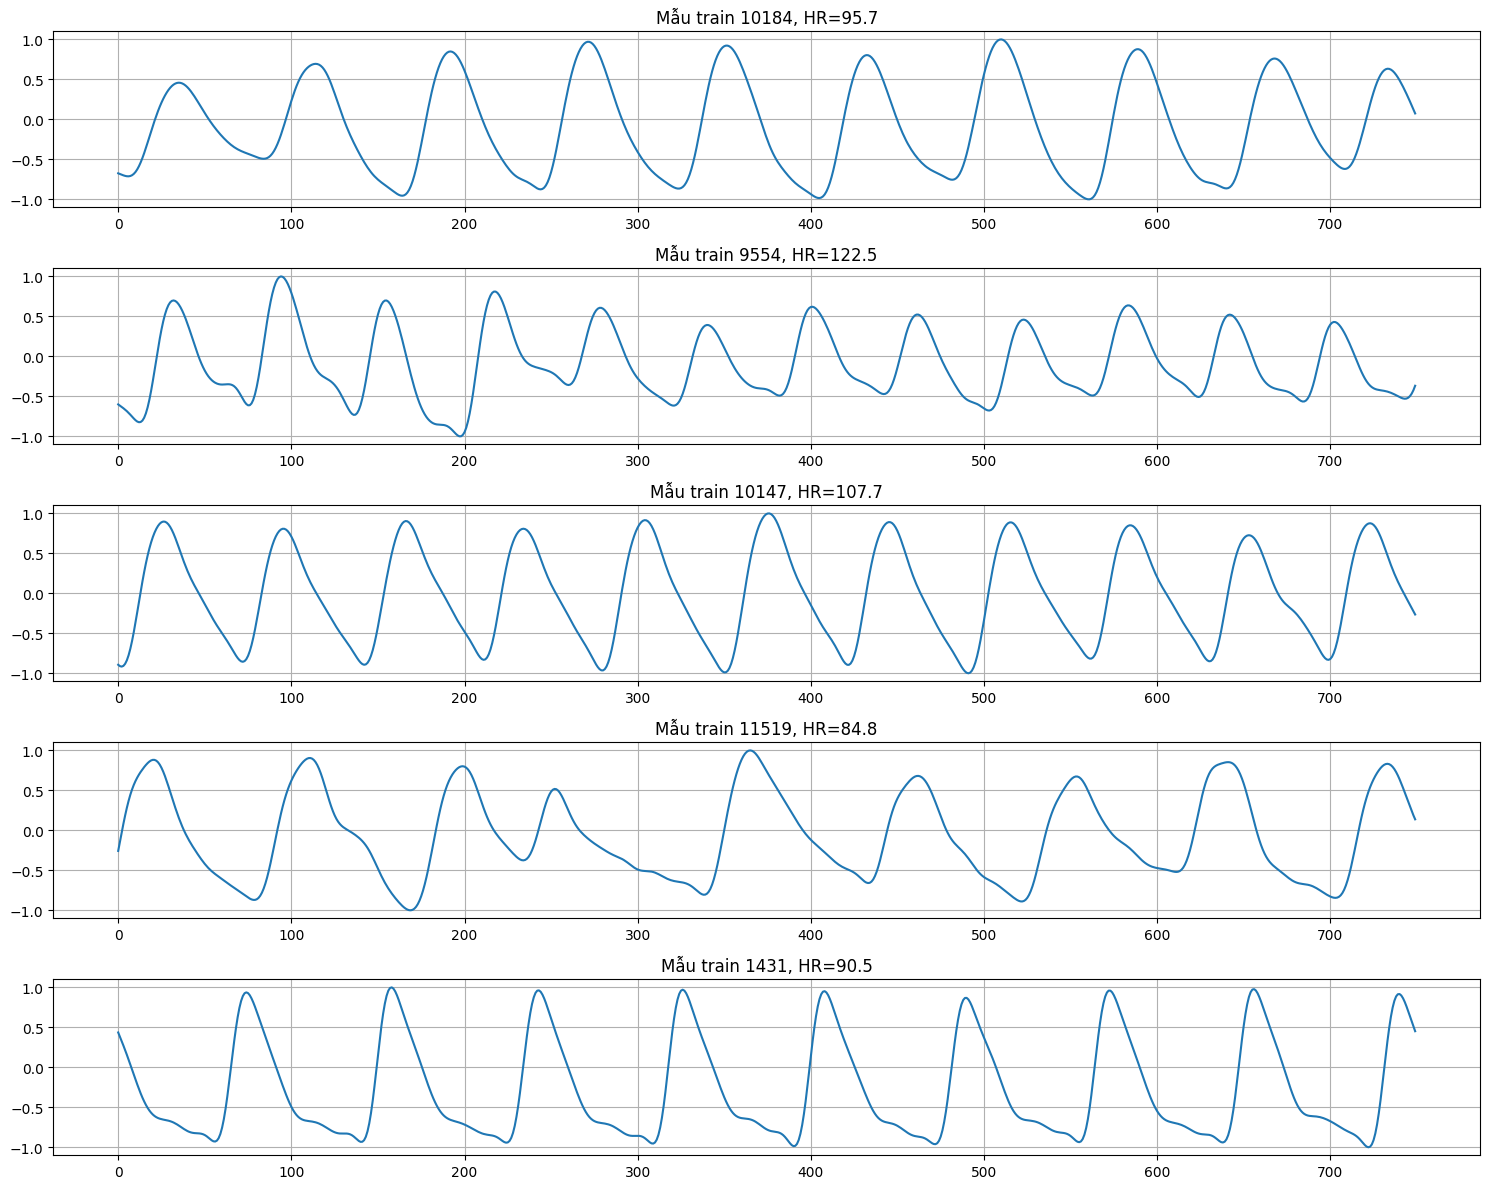

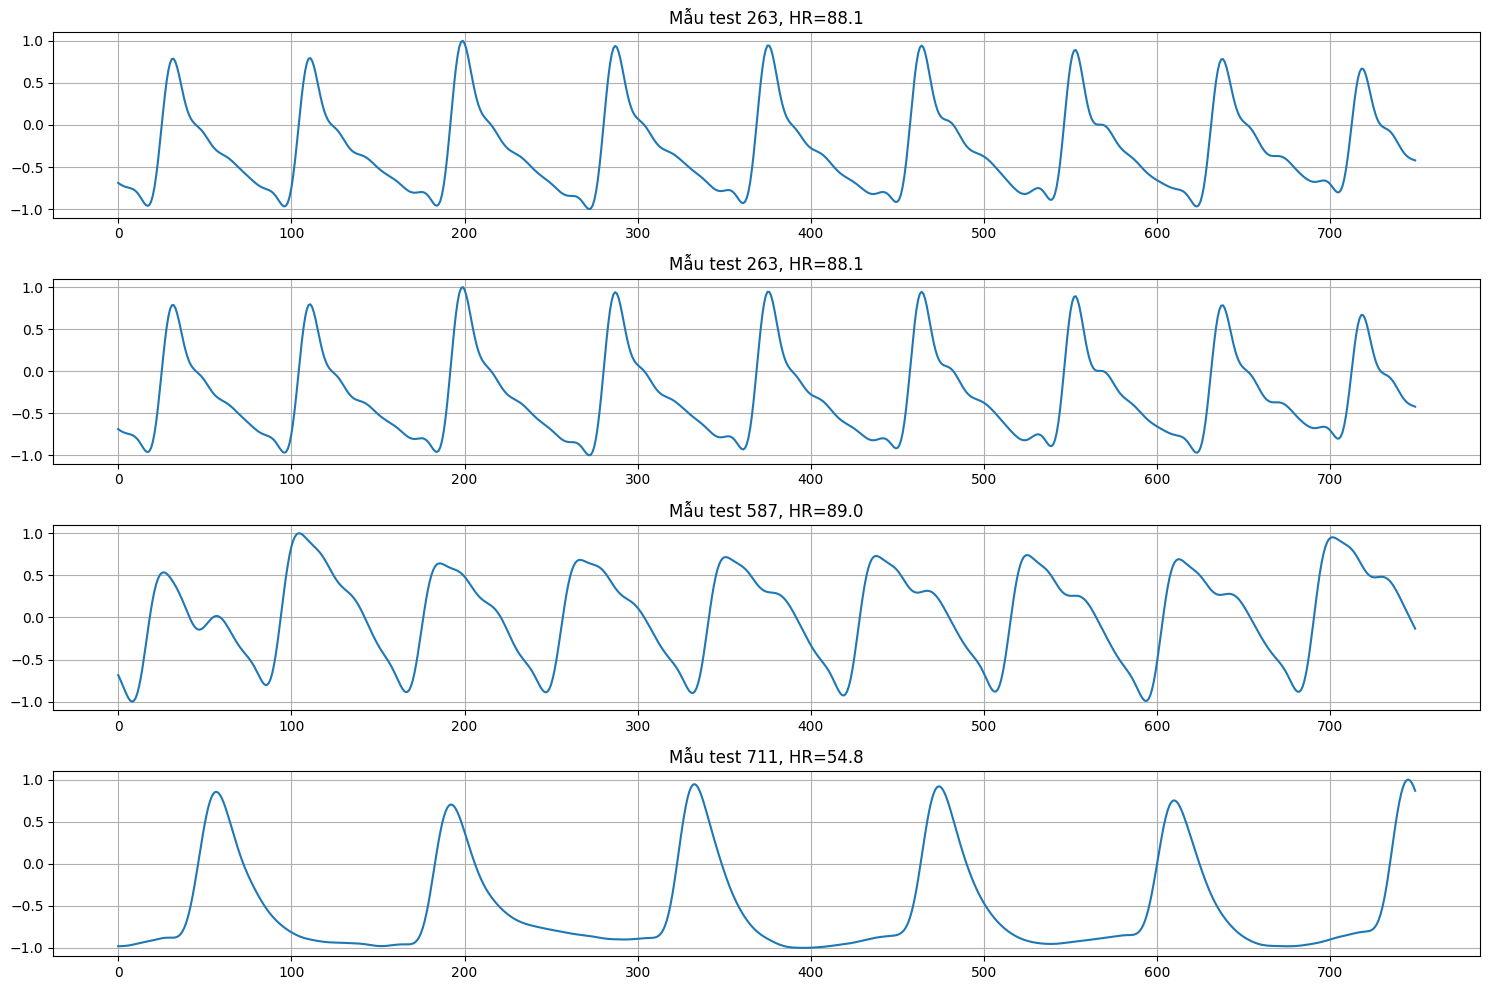

In [2]:
print("Đang load dữ liệu từ file combined_data.mat...")
loaded_data = loadmat('./combined_data.mat')

# Trích xuất dữ liệu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten để chuyển từ (1, n) thành (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)

# Kiểm tra kích thước dữ liệu đã load
print("\nShape của dữ liệu đã load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# Vẽ một vài mẫu từ dữ liệu đã load
plt.figure(figsize=(15, 12))

# Vẽ 5 mẫu tín hiệu từ tập train
for i in range(5):
    idx = np.random.randint(0, X_train_loaded.shape[0])
    plt.subplot(5, 1, i+1)
    plt.plot(X_train_loaded[idx])
    plt.title(f'Mẫu train {idx}, HR={hr_raw_train_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ một vài mẫu từ tập test
plt.figure(figsize=(15, 10))

# Vẽ 4 mẫu tín hiệu từ tập test
for i in range(4):
    idx = np.random.randint(0, X_test_loaded.shape[0])
    plt.subplot(4, 1, i+1)
    plt.plot(X_test_loaded[idx])
    plt.title(f'Mẫu test {idx}, HR={hr_raw_test_loaded[idx]:.1f}')
    plt.grid(True)

plt.tight_layout()
plt.show()



Shape của dữ liệu đã load:
X_train_loaded shape: (11956, 750)
hr_raw_train_loaded shape: (11956,)
X_test_loaded shape: (2990, 750)
hr_raw_test_loaded shape: (2990,)
X_total_loaded shape: (14946, 750)
hr_raw_total_loaded shape: (14946,)

Thống kê HR raw total:
Min: 50.23, Max: 143.53
Mean: 86.85, Std: 17.46
Mean ± Std: 86.85 ± 17.46


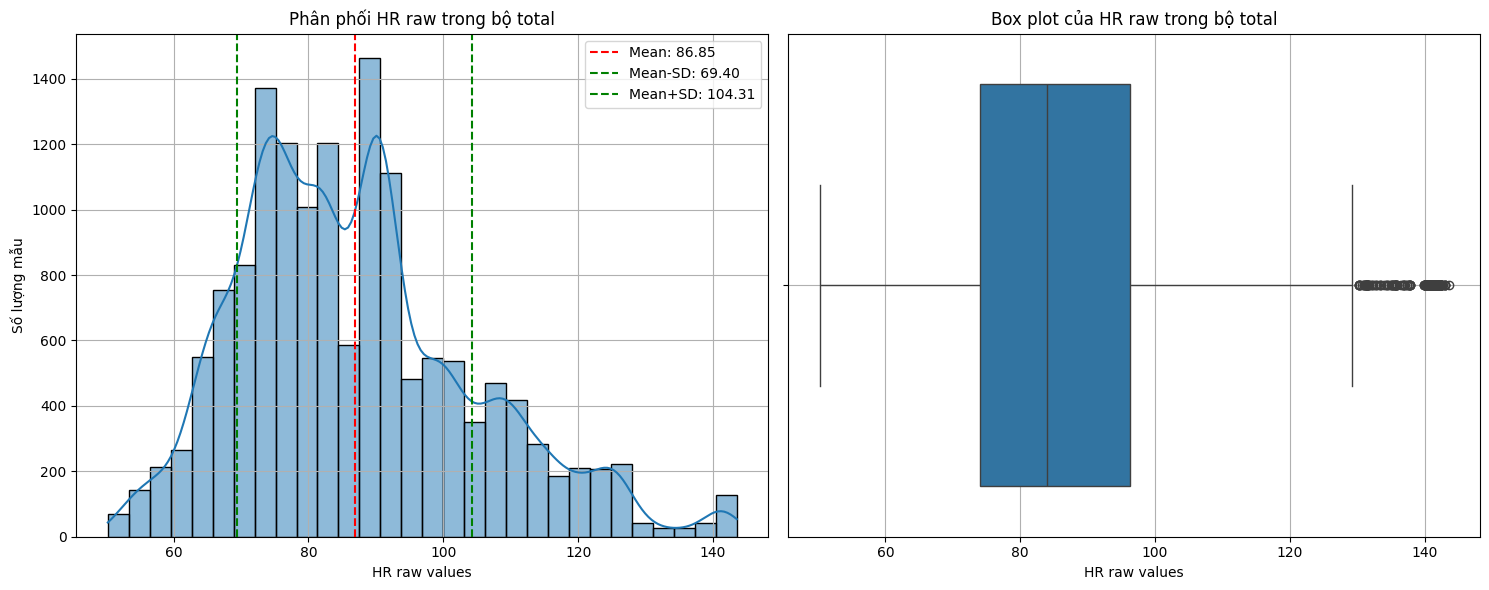


Lọc dữ liệu trong khoảng HR raw: [51.94, 121.77]

Thống kê HR raw total sau khi chuẩn hóa:
Min: 0.0002, Max: 0.9997
Mean: 0.4711, Std: 0.2128


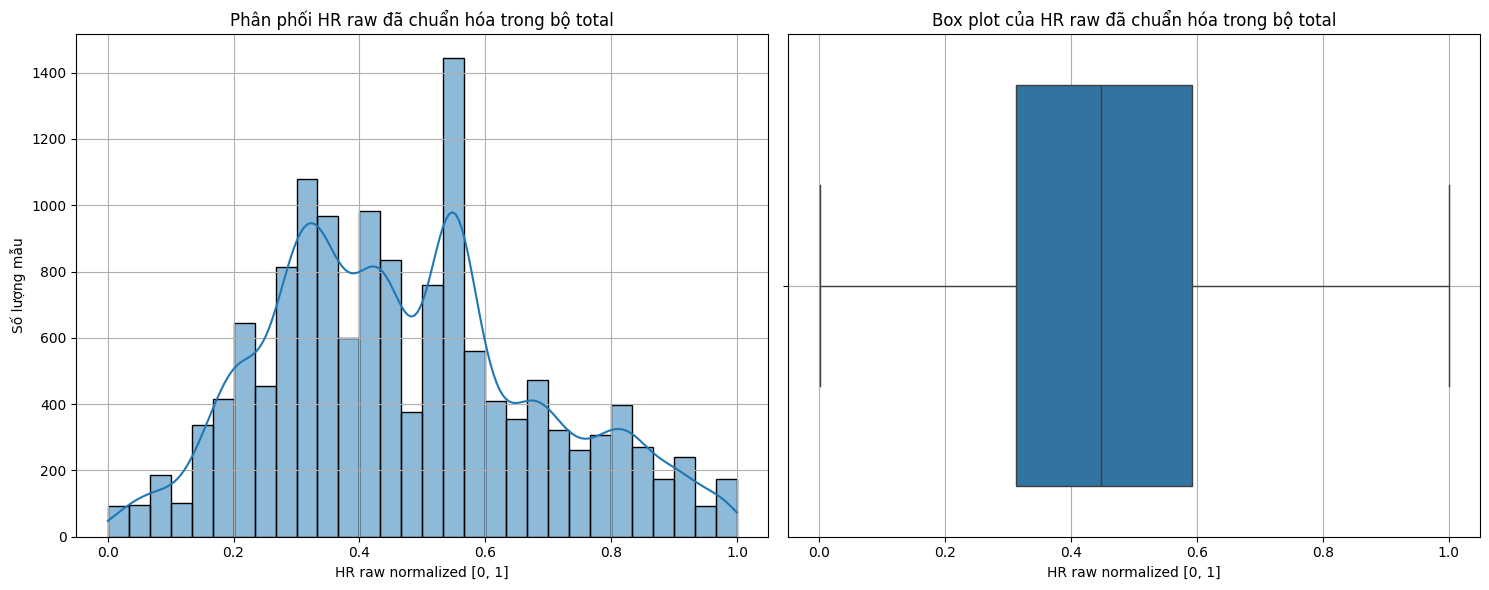

Số mẫu train ban đầu: 11956
Số mẫu train sau khi lọc: 11376
Tỷ lệ giữ lại (train): 95.15%
Số mẫu test ban đầu: 2990
Số mẫu test sau khi lọc: 2845
Tỷ lệ giữ lại (test): 95.15%

Thống kê HR raw sau khi chia tập:
Train - Min: 0.0002, Max: 0.9997
Train - Mean: 0.4701, Std: 0.2132
Test - Min: 0.0045, Max: 0.9985
Test - Mean: 0.4750, Std: 0.2112


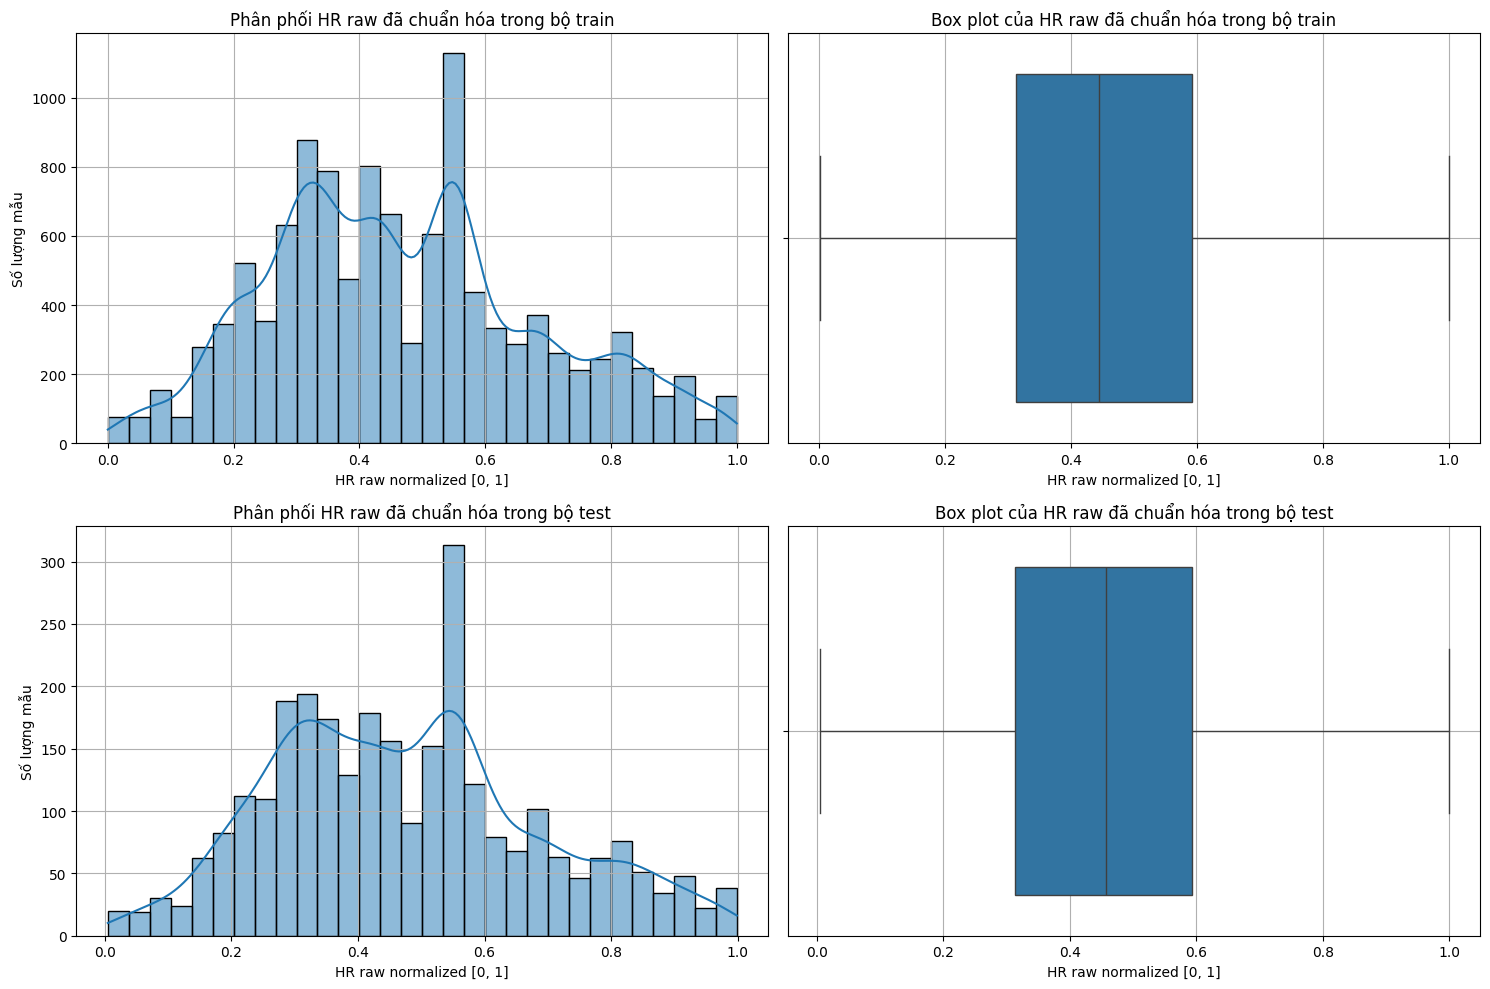

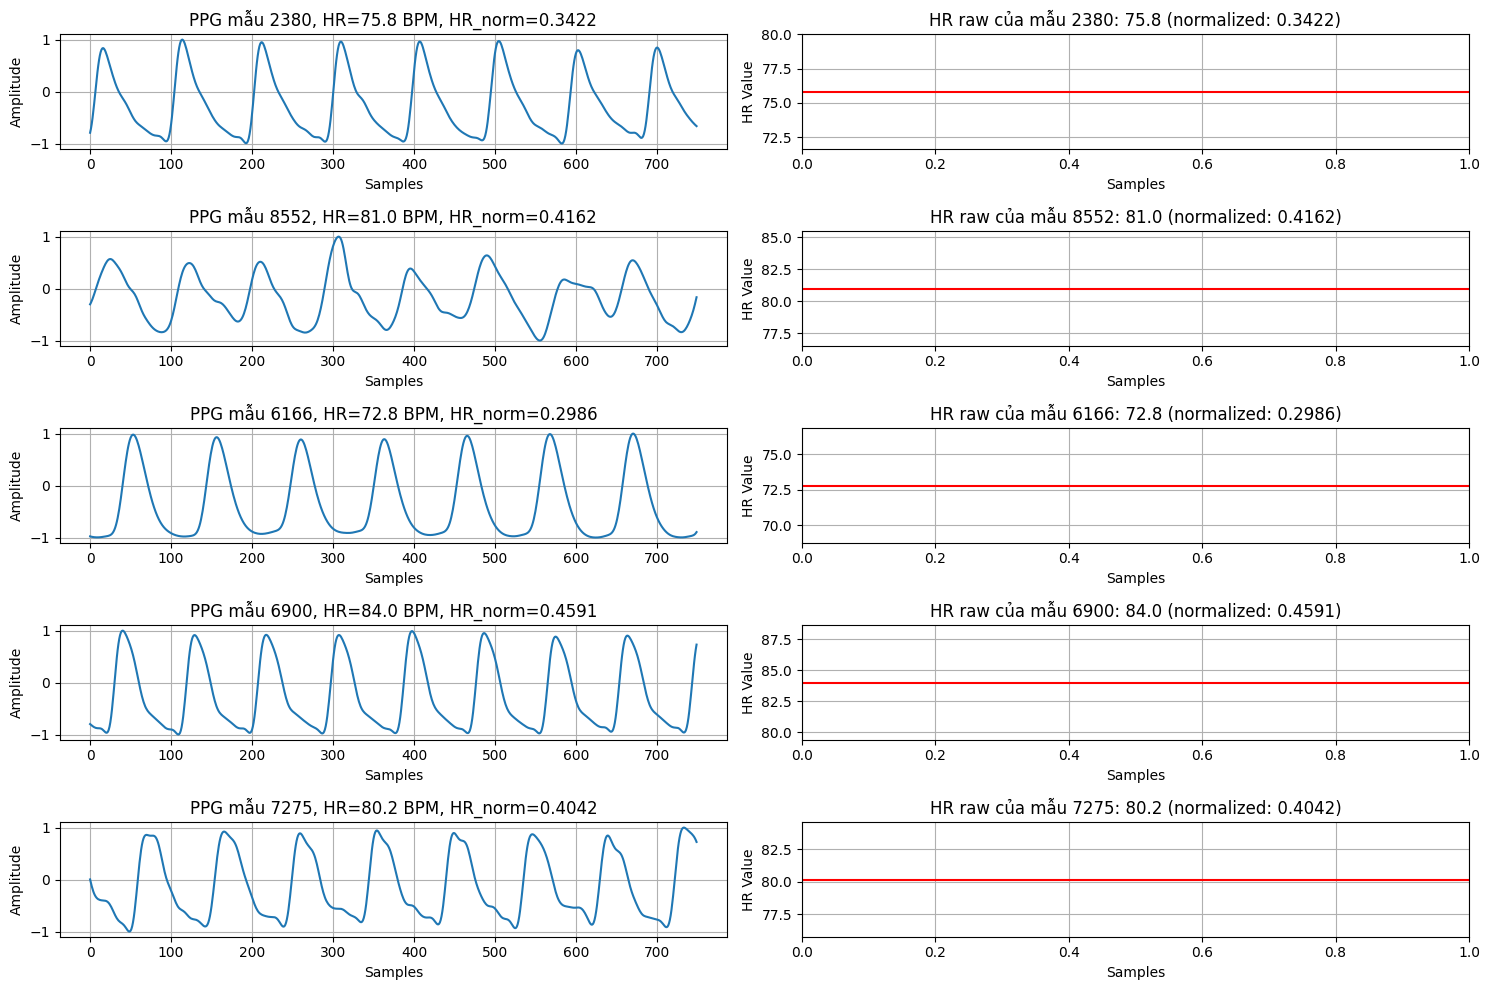

In [3]:
# Trích xuất dữ liệu
X_train_loaded = loaded_data['X_train_norm']
X_test_loaded = loaded_data['X_test_norm']
hr_raw_train_loaded = loaded_data['hr_raw_train'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)
hr_raw_test_loaded = loaded_data['hr_raw_test'].flatten()    # Flatten để chuyển từ (1, n) thành (n,)
X_total_loaded = loaded_data['X_total_norm']
hr_raw_total_loaded = loaded_data['hr_raw_total'].flatten()  # Flatten để chuyển từ (1, n) thành (n,)

# Kiểm tra kích thước dữ liệu đã load
print("\nShape của dữ liệu đã load:")
print(f"X_train_loaded shape: {X_train_loaded.shape}")
print(f"hr_raw_train_loaded shape: {hr_raw_train_loaded.shape}")
print(f"X_test_loaded shape: {X_test_loaded.shape}")
print(f"hr_raw_test_loaded shape: {hr_raw_test_loaded.shape}")
print(f"X_total_loaded shape: {X_total_loaded.shape}")
print(f"hr_raw_total_loaded shape: {hr_raw_total_loaded.shape}")

# Tính toán thống kê cho hr_raw_total_loaded
hr_raw_total_min = np.min(hr_raw_total_loaded)
hr_raw_total_max = np.max(hr_raw_total_loaded)
hr_raw_total_mean = np.mean(hr_raw_total_loaded)
hr_raw_total_std = np.std(hr_raw_total_loaded)

# In thống kê
print("\nThống kê HR raw total:")
print(f"Min: {hr_raw_total_min:.2f}, Max: {hr_raw_total_max:.2f}")
print(f"Mean: {hr_raw_total_mean:.2f}, Std: {hr_raw_total_std:.2f}")
print(f"Mean ± Std: {hr_raw_total_mean:.2f} ± {hr_raw_total_std:.2f}")

# Vẽ phân phối HR raw của bộ total
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_loaded, kde=True, bins=30)
plt.title('Phân phối HR raw trong bộ total')
plt.xlabel('HR raw values')
plt.ylabel('Số lượng mẫu')
plt.axvline(hr_raw_total_mean, color='r', linestyle='--', label=f'Mean: {hr_raw_total_mean:.2f}')
plt.axvline(hr_raw_total_mean - hr_raw_total_std, color='g', linestyle='--', label=f'Mean-SD: {hr_raw_total_mean - hr_raw_total_std:.2f}')
plt.axvline(hr_raw_total_mean + hr_raw_total_std, color='g', linestyle='--', label=f'Mean+SD: {hr_raw_total_mean + hr_raw_total_std:.2f}')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_loaded)
plt.title('Box plot của HR raw trong bộ total')
plt.xlabel('HR raw values')
plt.grid(True)

plt.tight_layout()
plt.show()

# Lọc dữ liệu nằm trong phạm vi mean ± 2*std của HR raw total
hr_raw_lower_bound = hr_raw_total_mean - 2 * hr_raw_total_std
hr_raw_upper_bound = hr_raw_total_mean + 2 * hr_raw_total_std

print(f"\nLọc dữ liệu trong khoảng HR raw: [{hr_raw_lower_bound:.2f}, {hr_raw_upper_bound:.2f}]")

# Tạo mask cho các mẫu nằm trong khoảng cho toàn bộ dữ liệu total
valid_mask_total = np.logical_and(
    hr_raw_total_loaded >= hr_raw_lower_bound,
    hr_raw_total_loaded <= hr_raw_upper_bound
)

# Lọc dữ liệu total
X_total_filtered = X_total_loaded[valid_mask_total]
hr_raw_total_filtered = hr_raw_total_loaded[valid_mask_total]

# Chuẩn hóa HR raw về khoảng [0, 1] dựa trên mean và std đã biết
hr_raw_mean = hr_raw_total_mean
hr_raw_std = hr_raw_total_std

# Hàm chuẩn hóa HR raw về khoảng [0, 1]
def normalize_hr_raw(hr_raw_data, mean=hr_raw_mean, std=hr_raw_std):
    # Sử dụng min-max normalization để scale về [0, 1]
    # Lấy giá trị min và max từ dữ liệu đã lọc
    hr_min = hr_raw_lower_bound  # Sử dụng giá trị biên dưới đã lọc
    hr_max = hr_raw_upper_bound  # Sử dụng giá trị biên trên đã lọc

    # Công thức chuẩn hóa min-max: (x - min) / (max - min)
    normalized = (hr_raw_data - hr_min) / (hr_max - hr_min)

    # Đảm bảo giá trị nằm trong khoảng [0, 1]
    normalized = np.clip(normalized, 0, 1)

    return normalized

# Áp dụng chuẩn hóa cho dữ liệu total đã lọc
hr_raw_total_normalized = normalize_hr_raw(hr_raw_total_filtered)

# Kiểm tra kết quả chuẩn hóa
print("\nThống kê HR raw total sau khi chuẩn hóa:")
print(f"Min: {np.min(hr_raw_total_normalized):.4f}, Max: {np.max(hr_raw_total_normalized):.4f}")
print(f"Mean: {np.mean(hr_raw_total_normalized):.4f}, Std: {np.std(hr_raw_total_normalized):.4f}")

# Vẽ phân phối HR raw sau khi chuẩn hóa
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(hr_raw_total_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ total')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=hr_raw_total_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ total')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Chia lại thành tập train và test từ dữ liệu total đã lọc và chuẩn hóa
from sklearn.model_selection import train_test_split

# Sử dụng tỷ lệ 80% train, 20% test
X_train_filtered, X_test_filtered, hr_raw_train_normalized, hr_raw_test_normalized = train_test_split(
    X_total_filtered, hr_raw_total_normalized, test_size=0.2, random_state=42
)

# Lấy giá trị HR raw gốc tương ứng cho việc hiển thị - Sửa lỗi MemoryError
# Thay vì tạo bản sao mới, sử dụng lại indices từ lần split trước
train_indices = np.arange(len(X_total_filtered))
train_indices, test_indices = train_test_split(
    train_indices, test_size=0.2, random_state=42
)
hr_raw_train_filtered = hr_raw_total_filtered[train_indices]
hr_raw_test_filtered = hr_raw_total_filtered[test_indices]

# In thông tin về số lượng mẫu đã lọc
print(f"Số mẫu train ban đầu: {X_train_loaded.shape[0]}")
print(f"Số mẫu train sau khi lọc: {X_train_filtered.shape[0]}")
print(f"Tỷ lệ giữ lại (train): {X_train_filtered.shape[0]/X_train_loaded.shape[0]*100:.2f}%")

print(f"Số mẫu test ban đầu: {X_test_loaded.shape[0]}")
print(f"Số mẫu test sau khi lọc: {X_test_filtered.shape[0]}")
print(f"Tỷ lệ giữ lại (test): {X_test_filtered.shape[0]/X_test_loaded.shape[0]*100:.2f}%")

# Kiểm tra thống kê HR raw sau khi chia tập
print("\nThống kê HR raw sau khi chia tập:")
print(f"Train - Min: {np.min(hr_raw_train_normalized):.4f}, Max: {np.max(hr_raw_train_normalized):.4f}")
print(f"Train - Mean: {np.mean(hr_raw_train_normalized):.4f}, Std: {np.std(hr_raw_train_normalized):.4f}")
print(f"Test - Min: {np.min(hr_raw_test_normalized):.4f}, Max: {np.max(hr_raw_test_normalized):.4f}")
print(f"Test - Mean: {np.mean(hr_raw_test_normalized):.4f}, Std: {np.std(hr_raw_test_normalized):.4f}")

# Vẽ phân phối HR raw sau khi chia tập
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(hr_raw_train_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ train')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(x=hr_raw_train_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ train')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(hr_raw_test_normalized, kde=True, bins=30)
plt.title('Phân phối HR raw đã chuẩn hóa trong bộ test')
plt.xlabel('HR raw normalized [0, 1]')
plt.ylabel('Số lượng mẫu')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(x=hr_raw_test_normalized)
plt.title('Box plot của HR raw đã chuẩn hóa trong bộ test')
plt.xlabel('HR raw normalized [0, 1]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ một vài mẫu để double check
plt.figure(figsize=(15, 10))
for i in range(5):
    idx = np.random.randint(0, X_train_filtered.shape[0])

    # Vẽ tín hiệu PPG
    plt.subplot(5, 2, i*2+1)
    plt.plot(X_train_filtered[idx])
    plt.title(f'PPG mẫu {idx}, HR={hr_raw_train_filtered[idx]:.1f} BPM, HR_norm={hr_raw_train_normalized[idx]:.4f}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Vẽ tín hiệu HR raw tương ứng
    plt.subplot(5, 2, i*2+2)
    plt.axhline(hr_raw_train_filtered[idx], color='r')
    plt.title(f'HR raw của mẫu {idx}: {hr_raw_train_filtered[idx]:.1f} (normalized: {hr_raw_train_normalized[idx]:.4f})')
    plt.xlabel('Samples')
    plt.ylabel('HR Value')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [4]:
# Thiết lập device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng device: {device}")

# Chuyển đổi dữ liệu đã lọc và chuẩn hóa thành tensor
X_train_tensor = torch.FloatTensor(X_train_filtered)
hr_raw_train_tensor = torch.FloatTensor(hr_raw_train_normalized.reshape(-1, 1))  # Reshape để có shape (n, 1)

X_test_tensor = torch.FloatTensor(X_test_filtered)
hr_raw_test_tensor = torch.FloatTensor(hr_raw_test_normalized.reshape(-1, 1))  # Reshape để có shape (n, 1)

# Tạo dataset và dataloader
train_dataset = TensorDataset(X_train_tensor, hr_raw_train_tensor)
test_dataset = TensorDataset(X_test_tensor, hr_raw_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Sử dụng device: cuda


In [5]:
import scipy.io as sio
data_to_save = {
    'X_train_filtered': X_train_filtered,
    'hr_raw_train_normalized': hr_raw_train_normalized,
    'X_test_filtered': X_test_filtered,
    'hr_raw_test_normalized': hr_raw_test_normalized
}
sio.savemat('final_combined_data.mat', data_to_save)
print("Đã lưu dữ liệu vào file final_combined_data.mat thành công!")

# Kiểm tra kích thước dữ liệu
print(f"X_train_filtered shape: {X_train_filtered.shape}")
print(f"hr_raw_train_normalized shape: {hr_raw_train_normalized.shape}")
print(f"X_test_filtered shape: {X_test_filtered.shape}")
print(f"hr_raw_test_normalized shape: {hr_raw_test_normalized.shape}")

# Kiểm tra kích thước dữ liệu trong dataloader
sample_data, sample_condition = next(iter(train_loader))
print(f"Batch data shape: {sample_data.shape}")
print(f"Batch condition shape: {sample_condition.shape}")

# Thiết lập các tham số cho mô hình dựa trên dữ liệu mới
input_size = X_train_filtered.shape[1]  # Kích thước của tín hiệu PPG từ dữ liệu đã load
condition_size = 1  # Kích thước của điều kiện (HR raw đã chuẩn hóa)
latent_dim = 64  # Kích thước không gian tiềm ẩn
hidden_dims = [256, 128, 64]  # Kích thước các lớp ẩn

print(f"Xây dựng mô hình với input_size={input_size}, condition_size={condition_size}")


Đã lưu dữ liệu vào file final_combined_data.mat thành công!
X_train_filtered shape: (11376, 750)
hr_raw_train_normalized shape: (11376,)
X_test_filtered shape: (2845, 750)
hr_raw_test_normalized shape: (2845,)
Batch data shape: torch.Size([64, 750])
Batch condition shape: torch.Size([64, 1])
Xây dựng mô hình với input_size=750, condition_size=1


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Generator (kết hợp noise + HR → PPG signal)
class CGANGenerator(nn.Module):
    def __init__(self, noise_dim, condition_dim, output_dim=750):
        super(CGANGenerator, self).__init__()
        self.fc = nn.Linear(noise_dim + condition_dim, 128 * 47)
        self.net = nn.Sequential(
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.ConvTranspose1d(32, 1, kernel_size=6, stride=4, padding=1),
            nn.Tanh()
        )

    def forward(self, z, condition):
        x = torch.cat([z, condition], dim=1)
        x = self.fc(x).view(-1, 128, 47)
        x = self.net(x)
        x = x[:, :, :750]
        return x.view(-1, 750)


# Discriminator (nhận PPG + HR → xác suất real/fake)
class CGANDiscriminator(nn.Module):
    def __init__(self, input_dim, condition_dim):
        super(CGANDiscriminator, self).__init__()
        self.condition_fc = nn.Linear(condition_dim, input_dim)  # điều kiện HR → map thành vector cùng chiều với PPG
        self.net = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv1d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv1d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * (input_dim // 8), 1),
            nn.Sigmoid()
        )

    def forward(self, x, condition):
        condition_expanded = self.condition_fc(condition)  # shape: (batch, 750)
        x = x + condition_expanded  # gộp điều kiện HR bằng cách cộng
        x = x.view(-1, 1, x.shape[1])  # reshape về (batch, 1, signal_length)
        return self.net(x)


# Tham số
noise_dim = 30
condition_dim = 1
output_dim = 750

# Khởi tạo mô hình
generator = CGANGenerator(noise_dim, condition_dim, output_dim).to(device)
discriminator = CGANDiscriminator(output_dim, condition_dim).to(device)

# Optimizers
lr = 1e-5
beta1 = 0.5
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))


# In tổng số tham số
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Generator Parameters:")
for name, param in generator.named_parameters():
    print(f"{name}: {param.shape}")

print("\nDiscriminator Parameters:")
for name, param in discriminator.named_parameters():
    print(f"{name}: {param.shape}")

print("\nTotal Parameters in Generator:", count_parameters(generator))
print("Total Parameters in Discriminator:", count_parameters(discriminator))
print("Total Parameters in both models:", count_parameters(generator) + count_parameters(discriminator))


# Kiểm tra 1 forward pass
z = torch.randn(1, noise_dim).to(device)
hr = torch.randn(1, condition_dim).to(device)

fake_ppg = generator(z, hr)
print("\nSample generated PPG:", fake_ppg)

real_ppg = torch.randn(1, output_dim).to(device)
real_output = discriminator(real_ppg, hr)
fake_output = discriminator(fake_ppg, hr)

print("\nDiscriminator output for real PPG:", real_output)
print("Discriminator output for fake PPG:", fake_output)


Generator Parameters:
fc.weight: torch.Size([6016, 31])
fc.bias: torch.Size([6016])
net.0.weight: torch.Size([128])
net.0.bias: torch.Size([128])
net.2.weight: torch.Size([128, 64, 4])
net.2.bias: torch.Size([64])
net.3.weight: torch.Size([64])
net.3.bias: torch.Size([64])
net.5.weight: torch.Size([64, 32, 4])
net.5.bias: torch.Size([32])
net.6.weight: torch.Size([32])
net.6.bias: torch.Size([32])
net.8.weight: torch.Size([32, 1, 6])
net.8.bias: torch.Size([1])

Discriminator Parameters:
condition_fc.weight: torch.Size([750, 1])
condition_fc.bias: torch.Size([750])
net.0.weight: torch.Size([32, 1, 4])
net.0.bias: torch.Size([32])
net.2.weight: torch.Size([64, 32, 4])
net.2.bias: torch.Size([64])
net.4.weight: torch.Size([128, 64, 4])
net.4.bias: torch.Size([128])
net.7.weight: torch.Size([1, 11904])
net.7.bias: torch.Size([1])

Total Parameters in Generator: 234209
Total Parameters in Discriminator: 54717
Total Parameters in both models: 288926

Sample generated PPG: tensor([[ 7.2045e-

In [55]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# === THIẾT LẬP SIÊU THAM SỐ ===
batch_size = 64
epochs = 400
noise_dim = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = X_train_filtered.shape[1]  # 750 (tín hiệu PPG)
condition_size = 1  # HR (điều kiện)
latent_dim = 64  # Không gian tiềm ẩn
lr = 1e-5  # Learning rate tốt hơn cho CGAN

# === TẠO DATASET ===
# Chuyển dữ liệu về dạng tensor và đảm bảo HR có shape (N, 1)
X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
HR_train_tensor = torch.tensor(hr_raw_train_normalized, dtype=torch.float32).view(-1, 1)  # Định dạng (N, 1)

train_dataset = TensorDataset(X_train_tensor, HR_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# === KHỞI TẠO MÔ HÌNH CGAN ===
generator = CGANGenerator(noise_dim, condition_size, input_size).to(device)
discriminator = CGANDiscriminator(input_size, condition_size).to(device)

# === LOSS VÀ OPTIMIZER ===
adversarial_loss = nn.BCELoss().to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# === HUẤN LUYỆN CGAN ===
for epoch in range(epochs):
    generator.train()
    discriminator.train()
    
    total_g_loss = 0
    total_d_loss = 0

    for real_data, hr in train_loader:
        real_data = real_data.to(device)
        hr = hr.to(device)
        batch_size = real_data.size(0)

        # ====================
        # Train Discriminator
        # ====================
        optimizer_D.zero_grad()

        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Discriminator với real
        real_output = discriminator(real_data, hr)
        d_real_loss = adversarial_loss(real_output, valid)

        # Discriminator với fake
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_data = generator(z, hr)
        fake_output = discriminator(fake_data.detach(), hr)
        d_fake_loss = adversarial_loss(fake_output, fake)

        # Tổng loss
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        optimizer_D.step()

        # ====================
        # Train Generator
        # ====================
        optimizer_G.zero_grad()

        fake_output = discriminator(fake_data, hr)
        g_loss = adversarial_loss(fake_output, valid)  # Muốn đánh lừa D

        g_loss.backward()
        optimizer_G.step()

        total_g_loss += g_loss.item()
        total_d_loss += d_loss.item()

    # In log mỗi 10 epochs
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"[Epoch {epoch}/{epochs}] D_loss: {total_d_loss:.4f} | G_loss: {total_g_loss:.4f}")

print("🎉 Training completed!")


[Epoch 0/400] D_loss: 234.4987 | G_loss: 128.1730
[Epoch 10/400] D_loss: 207.7731 | G_loss: 149.6217
[Epoch 20/400] D_loss: 196.2252 | G_loss: 156.5001
[Epoch 30/400] D_loss: 168.2375 | G_loss: 185.5213
[Epoch 40/400] D_loss: 179.0988 | G_loss: 185.3178
[Epoch 50/400] D_loss: 194.4603 | G_loss: 176.7767
[Epoch 60/400] D_loss: 204.6404 | G_loss: 169.3997
[Epoch 70/400] D_loss: 212.7933 | G_loss: 161.5148
[Epoch 80/400] D_loss: 220.6037 | G_loss: 153.2382
[Epoch 90/400] D_loss: 227.4707 | G_loss: 145.7079
[Epoch 100/400] D_loss: 230.6700 | G_loss: 141.1418
[Epoch 110/400] D_loss: 233.3345 | G_loss: 137.8444
[Epoch 120/400] D_loss: 235.4321 | G_loss: 135.1619
[Epoch 130/400] D_loss: 237.1301 | G_loss: 133.3493
[Epoch 140/400] D_loss: 238.6916 | G_loss: 131.6683
[Epoch 150/400] D_loss: 239.4237 | G_loss: 130.6502
[Epoch 160/400] D_loss: 240.2313 | G_loss: 129.7672
[Epoch 170/400] D_loss: 240.9635 | G_loss: 129.0775
[Epoch 180/400] D_loss: 241.5935 | G_loss: 128.5203
[Epoch 190/400] D_loss:

In [57]:
def denormalize_hr(normalized_hr, min_hr=51.94, max_hr=121.77):
    """
    Chuyển đổi từ HR chuẩn hóa về HR thực

    Args:
        normalized_hr: giá trị HR đã chuẩn hóa (0-1)
        min_hr: giá trị HR tối thiểu
        max_hr: giá trị HR tối đa

    Returns:
        actual_hr: giá trị HR thực
    """
    return normalized_hr * (max_hr - min_hr) + min_hr


Generated PPG for HR = 99.8 bpm:
Generated PPG Signal: tensor([[-0.4278, -0.2863, -0.3126, -0.3029, -0.3763, -0.3783, -0.4276, -0.3881,
         -0.4872, -0.4824, -0.5537, -0.5333, -0.5445, -0.4859, -0.5633, -0.5942,
         -0.5972, -0.5914, -0.6010, -0.6189, -0.6680, -0.6722, -0.7163, -0.7244,
         -0.7263, -0.7471, -0.7877, -0.8419, -0.8319, -0.8699, -0.8599, -0.8882,
         -0.9036, -0.8976, -0.9120, -0.8897, -0.8907, -0.9053, -0.8683, -0.8825,
         -0.8329, -0.8334, -0.8120, -0.8215, -0.8434, -0.7676, -0.7738, -0.7781,
         -0.7775, -0.7420, -0.7761, -0.7139, -0.6866, -0.6439, -0.7017, -0.6429,
         -0.6839, -0.6185, -0.5586, -0.6315, -0.6554, -0.5847, -0.5875, -0.5923,
         -0.6228, -0.5869, -0.6010, -0.6075, -0.5625, -0.5627, -0.6363, -0.5827,
         -0.6725, -0.6128, -0.5909, -0.6528, -0.6499, -0.6244, -0.5660, -0.6473,
         -0.6380, -0.5697, -0.5500, -0.5272, -0.3459, -0.2197, -0.0898,  0.0661,
          0.1244,  0.2642,  0.3707,  0.4760,  0.6179, 

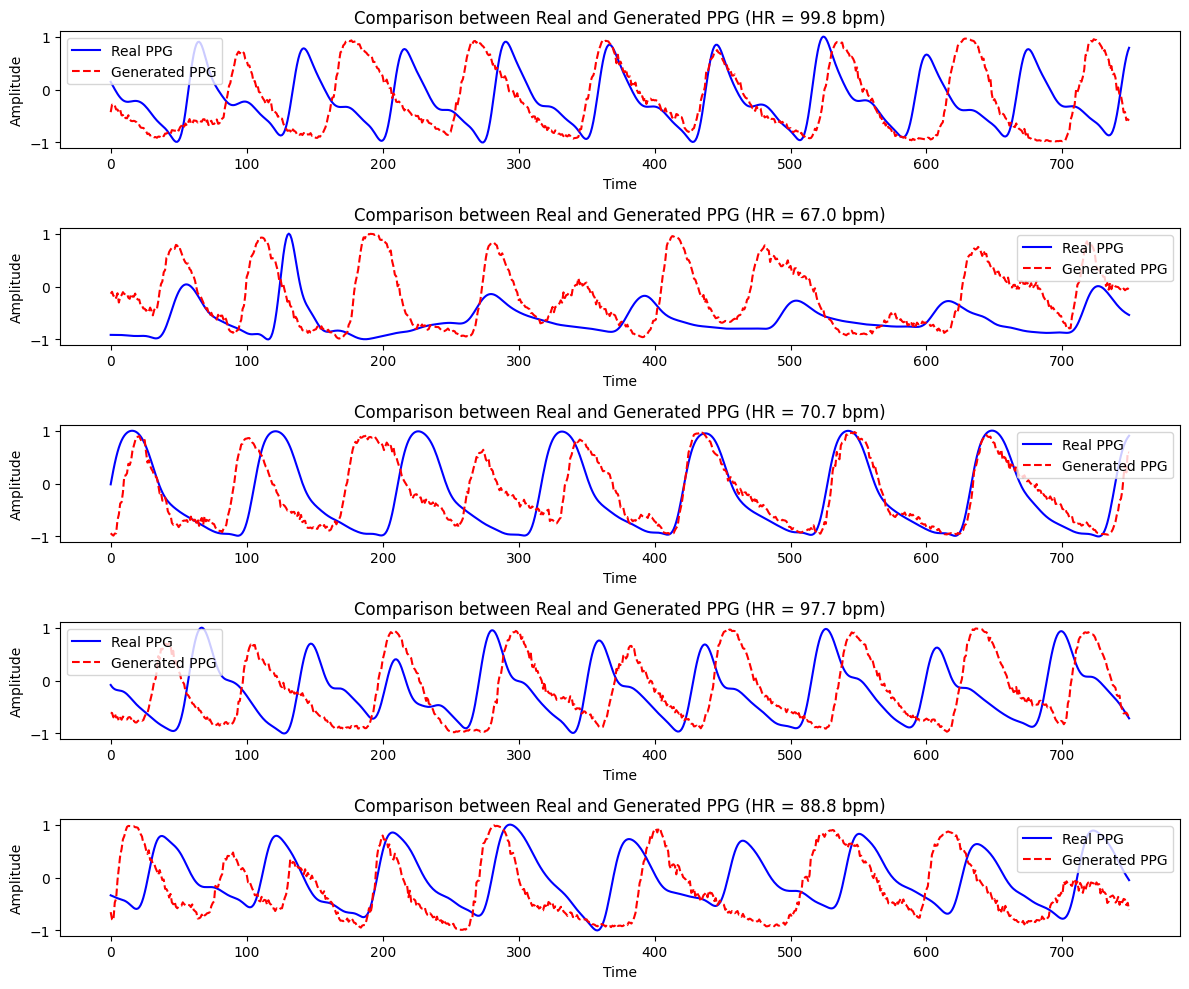

In [59]:
# In ra 5 tín hiệu PPG sinh từ Generator dựa trên các giá trị HR chuẩn hóa
num_samples = 5

# Vẽ đồ thị
plt.figure(figsize=(12, 10))

for i in range(num_samples):
    # Chọn chỉ số ngẫu nhiên HR từ dữ liệu huấn luyện
    hr_idx = np.random.randint(0, len(hr_raw_train_normalized))
    
    # Lấy giá trị HR chuẩn hóa
    hr_test = torch.tensor([hr_raw_train_normalized[hr_idx]], dtype=torch.float32).to(device)  # Chuyển về float32
    
    # Thêm chiều để ghép với z (chuyển từ (1,) thành (1, 1))
    hr_test = hr_test.view(-1, 1)  # Tạo tensor 2 chiều có shape (1, 1)
    
    # Sinh tín hiệu PPG từ Generator
    z_test = torch.randn(1, noise_dim, dtype=torch.float32).to(device)  # Chuyển về float32
    fake_ppg_test = generator(z_test, hr_test)
    
    # Lấy tín hiệu PPG thật từ dữ liệu huấn luyện
# Lấy tín hiệu PPG thật từ dữ liệu huấn luyện và chuyển thành numpy array trước khi chuyển thành tensor
    real_ppg_test = torch.tensor(np.array([X_train_filtered[hr_idx]]), dtype=torch.float32).to(device)
    
    # Chuyển HR chuẩn hóa về HR thực
    actual_hr = denormalize_hr(hr_test.item())
    
    # In tín hiệu PPG sinh và thật
    print(f"Generated PPG for HR = {actual_hr:.1f} bpm:")
    print("Generated PPG Signal:", fake_ppg_test)
    print("Real PPG Signal:", real_ppg_test)
    
    # Vẽ tín hiệu PPG sinh và thật
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(real_ppg_test.cpu().detach().numpy()[0], label='Real PPG', linestyle='-', color='b')
    plt.plot(fake_ppg_test.cpu().detach().numpy()[0], label='Generated PPG', linestyle='--', color='r')
    plt.title(f'Comparison between Real and Generated PPG (HR = {actual_hr:.1f} bpm)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()